In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, PatchTST, BiTCN

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/time-series-analysis/master/data/medium_views_published_holidays.csv')
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df['is_holiday'].value_counts()

is_holiday
0    1333
1      48
Name: count, dtype: int64

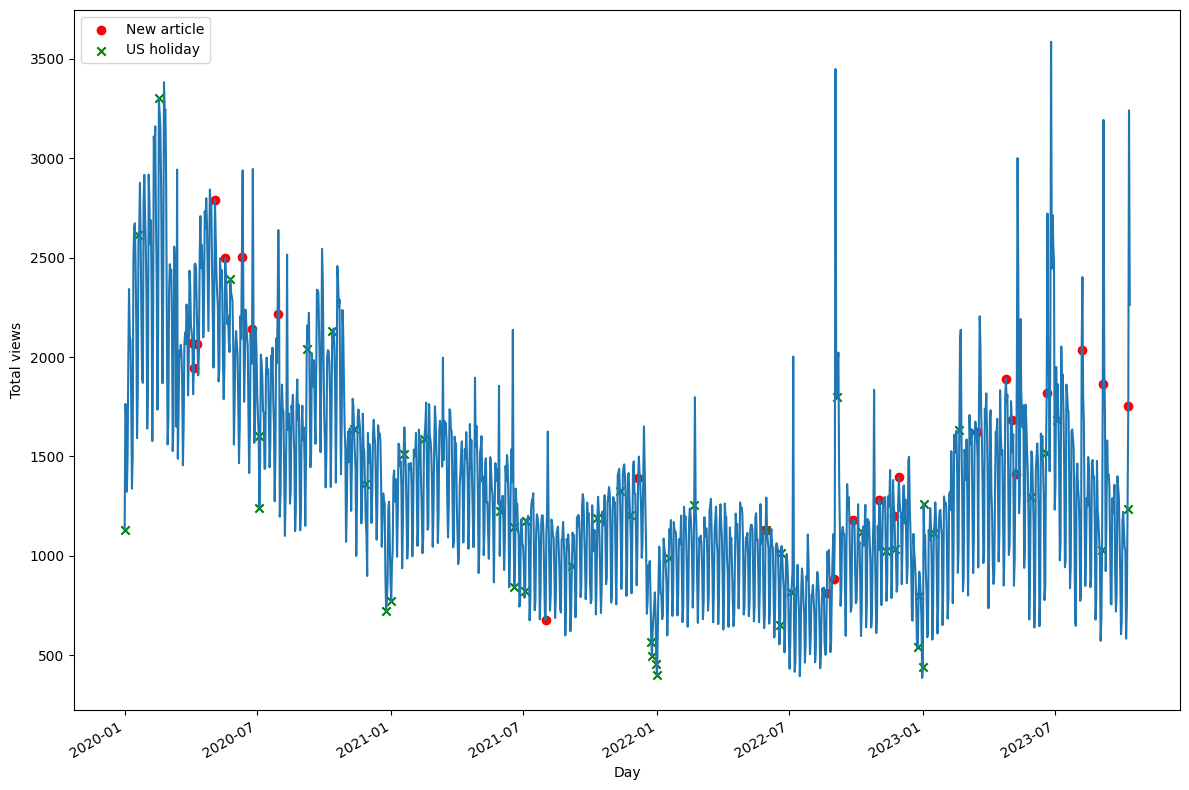

In [8]:
published_dates = df[df['published'] == 1]
holidays = df[df['is_holiday'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['ds'], df['y'])
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red', label='New article')
ax.scatter(holidays['ds'], holidays['y'], marker='x', color='green', label='US holiday')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()

plt.tight_layout()

In [10]:
train = df[:-28]
test = df[-28:]

In [13]:
future_df = test.drop(['y'], axis=1)


In [14]:
horizon = len(test)

models = [
    NHITS(
        h=horizon,
        input_size = 5*horizon,
        futr_exog_list=['published', 'is_holiday'],
        hist_exog_list=['published', 'is_holiday'],
        scaler_type='robust'),
    BiTCN(
        h=horizon,
        input_size=5*horizon,
        futr_exog_list=['published', 'is_holiday'],
        hist_exog_list=['published', 'is_holiday'],
        scaler_type='robust'),
    PatchTST(
        h=horizon,
        input_size=2*horizon,
        encoder_layers=3,
        hidden_size=128,
        linear_hidden_size=128,
        patch_len=4,
        stride=1,
        revin=True,
        max_steps=1000
    )
]

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1
Seed set to 1
Seed set to 1


In [15]:
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: C:\Users\janak\BiTCN\lightning_logs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 3.4 M 
-----------------------------------------------
3.4 M     Trainable params
0         Non-trainable params
3.4 M     Total params
13.521    Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                      | 0/? [00:00<…

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\utilities\data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name          | Type          | Params
-------------------------------------------------
0  | loss          | MAE           | 0     
1  | padder_train  | ConstantPad1d | 0     
2  | scaler        | TemporalNorm  | 0     
3  | lin_hist      | Linear        | 96    
4  | drop_hist     | Dropout       | 0     
5  | net_bwd       | Sequential    | 8.6 K 
6  | lin_futr      | Linear        | 48    
7  | drop_futr     | Dropout       | 0     
8  | net_fwd       | Sequential    | 8.6 K 
9  | drop_temporal | Dropout       | 0     
10 | temporal_lin1 | Linear        | 2.3 K 
11 | temporal_lin2 | Linear        | 476   
12 | output_lin    | Linear        | 49    
-------------------------------------------------
20.1 K    Trainable params
0         Non-trainable params
20.1 K    Total params
0.080 

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type              | Params
---------------------------------------------------
0 | loss         | MAE               | 0     
1 | padder_train | ConstantPad1d     | 0     
2 | scaler       | TemporalNorm      | 0     
3 | model        | PatchTST_backbone | 499 K 
---------------------------------------------------
499 K     Trainable params
3         Non-trainable params
499 K     Total params
1.999     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.


In [16]:
preds_df = nf.predict(futr_df=future_df)
preds_df.head()

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\neuralforecast\tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,NHITS,BiTCN,PatchTST
unique_id,,,,
0,2023-09-15,1026.158936,1246.526001,1211.335205
0,2023-09-16,449.107117,806.447632,785.460144
0,2023-09-17,991.683228,1023.169067,979.933472
0,2023-09-18,1405.161499,1540.649536,1593.468018
0,2023-09-19,1512.178833,1596.438232,1612.406494


In [17]:
test_df = pd.merge(test, preds_df, 'left', 'ds')
test_df

,unique_id,ds,y,published,is_holiday,NHITS,BiTCN,PatchTST
0,0,2023-09-15,1082,0.0,0,1026.158936,1246.526001,1211.335205
1,0,2023-09-16,758,0.0,0,449.107117,806.447632,785.460144
2,0,2023-09-17,755,0.0,0,991.683228,1023.169067,979.933472
3,0,2023-09-18,1290,0.0,0,1405.161499,1540.649536,1593.468018
4,0,2023-09-19,1214,0.0,0,1512.178833,1596.438232,1612.406494
5,0,2023-09-20,1244,0.0,0,1490.695923,1544.193970,1687.821289
6,0,2023-09-21,1357,0.0,0,1653.612305,1557.337280,1623.227417
7,0,2023-09-22,915,0.0,0,1318.982178,1228.389893,1532.285400
8,0,2023-09-23,719,0.0,0,834.631897,788.566162,1005.462280
9,0,2023-09-24,807,0.0,0,1070.127319,976.158813,1057.777222


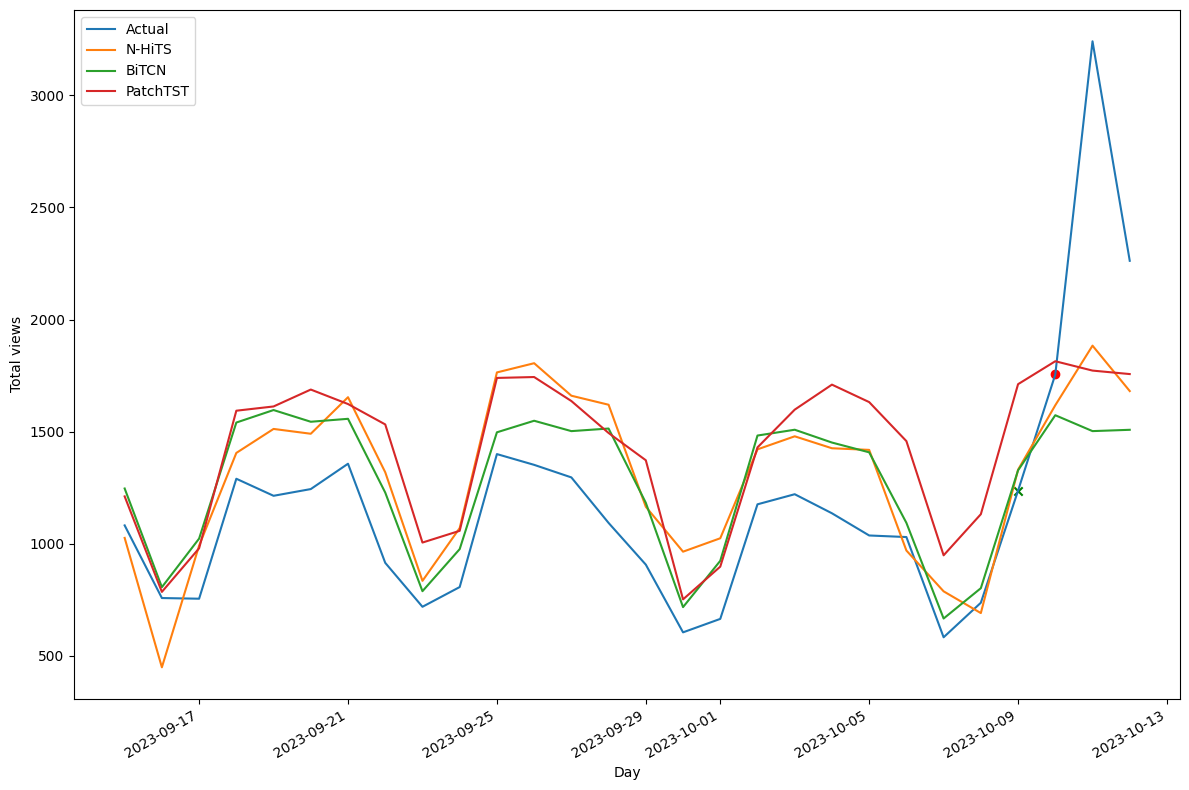

In [18]:
published_dates = test_df[test_df['published'] == 1]
holidays = test_df[test_df['is_holiday'] == 1]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(test_df['ds'], test_df['NHITS'], label='N-HiTS')
ax.plot(test_df['ds'], test_df['BiTCN'], label='BiTCN')
ax.plot(test_df['ds'], test_df['PatchTST'], label='PatchTST')
ax.scatter(published_dates['ds'], published_dates['y'], marker='o', color='red')
ax.scatter(holidays['ds'], holidays['y'], marker='x', color='green')
ax.set_xlabel('Day')
ax.set_ylabel('Total views')
ax.legend(loc='best')

fig.autofmt_xdate()


plt.tight_layout()

In [19]:
from utilsforecast.losses import mae, smape
from utilsforecast.evaluation import evaluate

evaluation = evaluate(
    test_df,
    metrics=[mae, smape],
    models=["NHITS", "BiTCN", "PatchTST"],
    target_col="y",
)

evaluation = evaluation.drop(['unique_id'], axis=1)
evaluation = evaluation.set_index('metric')

evaluation.style.highlight_min(color='blue', axis=1)

,NHITS,BiTCN,PatchTST
metric,,,
mae,310.080451,285.442439,384.373016
smape,0.123450,0.105247,0.145895
